In [ ]:
##Import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##Read in data
institutions = pd.read_csv("Most-Recent-Cohorts-Institution.csv")

C:\Users\riley\AppData\Local\Temp\ipykernel_22992\1276513643.py:1: DtypeWarning: Columns (9,1537,1540,1542,1606,1608,1614,1615,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1690,1692,1697,1700,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  institutions = pd.read_csv("Most-Recent-Cohorts-Institution.csv")


In [ ]:
#inspect columns
institutions.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'COUNT_WNE_MALE0_P11', 'COUNT_WNE_MALE1_P11', 'GT_THRESHOLD_P11',
       'MD_EARN_WNE_INC1_P11', 'MD_EARN_WNE_INC2_P11', 'MD_EARN_WNE_INC3_P11',
       'MD_EARN_WNE_INDEP0_P11', 'MD_EARN_WNE_INDEP1_P11',
       'MD_EARN_WNE_MALE0_P11', 'MD_EARN_WNE_MALE1_P11'],
      dtype='object', length=3305)

In [ ]:
##Make a subset of the data with columns to be used for analysis
subset = institutions[["INSTNM","MD_EARN_WNE_P10","CCBASIC","CCSIZSET","CCUGPROF","TUITIONFEE_OUT","APPL_SCH_PCT_GE5","FEMALE","PFTFTUG1_EF","ZIP","GT_THRESHOLD_1YR","VETERAN","MARRIED","ADMCON7","COMPL_RPY_1YR_RT","COMP_ORIG_YR6_RT","DEP_COMP_ORIG_YR4_RT","WDRAW_ORIG_YR2_RT","NOT1STGEN_COMP_ORIG_YR2_RT","UG25ABV","ACTMT25","SATMT25"]]

In [ ]:
##Look at correlations for numeric data
subset.corr(numeric_only=True)

,MD_EARN_WNE_P10,CCBASIC,CCSIZSET,CCUGPROF,TUITIONFEE_OUT,PFTFTUG1_EF,GT_THRESHOLD_1YR,ADMCON7,UG25ABV,ACTMT25,SATMT25
MD_EARN_WNE_P10,1.000000,0.483438,0.597621,0.574378,0.639338,-0.046969,0.236970,0.220688,-0.319638,0.777871,0.750257
CCBASIC,0.483438,1.000000,0.846247,0.776459,0.329126,-0.249186,0.116336,0.160212,-0.268531,-0.088742,-0.100141
CCSIZSET,0.597621,0.846247,1.000000,0.732739,0.503531,-0.170537,0.195567,0.277977,-0.455295,0.273637,0.270113
CCUGPROF,0.574378,0.776459,0.732739,1.000000,0.623241,-0.077544,0.144714,0.249821,-0.499096,0.470614,0.456741
TUITIONFEE_OUT,0.639338,0.329126,0.503531,0.623241,1.000000,0.470581,0.048792,0.318238,-0.469718,0.729829,0.716431
PFTFTUG1_EF,-0.046969,-0.249186,-0.170537,-0.077544,0.470581,1.000000,-0.069559,0.116686,-0.181019,0.504276,0.498261
GT_THRESHOLD_1YR,0.236970,0.116336,0.195567,0.144714,0.048792,-0.069559,1.000000,0.067342,0.000403,0.128873,0.105945
ADMCON7,0.220688,0.160212,0.277977,0.249821,0.318238,0.116686,0.067342,1.000000,-0.240765,0.133211,0.113882
UG25ABV,-0.319638,-0.268531,-0.455295,-0.499096,-0.469718,-0.181019,0.000403,-0.240765,1.000000,-0.442684,-0.443831
ACTMT25,0.777871,-0.088742,0.273637,0.470614,0.729829,0.504276,0.128873,0.133211,-0.442684,1.000000,0.907620


In [ ]:
##Savesubset to csv 
subset.to_csv('subset.csv', index=False)

In [ ]:
##Change PS to Null- PS (Privacy password protection)
df = pd.read_csv('subset.csv')
df.replace("PS", pd.NA, inplace=True)

In [63]:
##Drop columns with large # of null values
df.drop(columns=["ACTMT25", "ADMCON7", "SATMT25"], inplace=True)

In [64]:
##Change strings to floats
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

C:\Users\riley\AppData\Local\Temp\ipykernel_25460\931678124.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [8]:
#Check datatypes
df.dtypes

MD_EARN_WNE_P10               float64
CCBASIC                       float64
CCSIZSET                      float64
CCUGPROF                      float64
TUITIONFEE_OUT                float64
APPL_SCH_PCT_GE5              float64
FEMALE                        float64
PFTFTUG1_EF                   float64
ZIP                            object
GT_THRESHOLD_1YR              float64
VETERAN                       float64
MARRIED                       float64
COMPL_RPY_1YR_RT              float64
COMP_ORIG_YR6_RT              float64
DEP_COMP_ORIG_YR4_RT          float64
WDRAW_ORIG_YR2_RT             float64
NOT1STGEN_COMP_ORIG_YR2_RT    float64
UG25ABV                       float64
dtype: object

In [9]:
##Check how many missing values
print(df.isna().sum())

MD_EARN_WNE_P10               1129
CCBASIC                        495
CCSIZSET                       495
CCUGPROF                       495
TUITIONFEE_OUT                2713
APPL_SCH_PCT_GE5              2307
FEMALE                        1415
PFTFTUG1_EF                   1068
ZIP                              0
GT_THRESHOLD_1YR              1388
VETERAN                       4237
MARRIED                       1444
COMPL_RPY_1YR_RT              2152
COMP_ORIG_YR6_RT              1330
DEP_COMP_ORIG_YR4_RT          2484
WDRAW_ORIG_YR2_RT             1913
NOT1STGEN_COMP_ORIG_YR2_RT    3224
UG25ABV                        949
dtype: int64


In [ ]:
##remove any rows where target variable is Null
df = df[df["MD_EARN_WNE_P10"].notna()]


In [ ]:
#Save final subset
df.to_csv('new_subset2.csv', index=False)

In [ ]:
#Read in final
df = pd.read_csv("new_subset2.csv")

In [ ]:
###Look at correlations of final subset with instances removed where target value was null
corr = df.corr(numeric_only=True)
print(corr)
###CCBASIC, CCSIZSET, CCUGPROF are highly correlated with eachother 
###APPL_SCH_PCT_GE5 and TUITIONFEE_OUT are also highly correlated (0.764795)

                            MD_EARN_WNE_P10   CCBASIC  CCSIZSET  CCUGPROF  \
MD_EARN_WNE_P10                    1.000000  0.483438  0.597621  0.574378   
CCBASIC                            0.483438  1.000000  0.822051  0.855992   
CCSIZSET                           0.597621  0.822051  1.000000  0.880903   
CCUGPROF                           0.574378  0.855992  0.880903  1.000000   
TUITIONFEE_OUT                     0.639338  0.372707  0.518981  0.658043   
APPL_SCH_PCT_GE5                   0.605112  0.412696  0.567012  0.619088   
FEMALE                            -0.218547 -0.176616 -0.230221 -0.241574   
PFTFTUG1_EF                       -0.046969 -0.223046 -0.137081 -0.033328   
GT_THRESHOLD_1YR                   0.236970  0.111440  0.197743  0.126965   
VETERAN                           -0.028073 -0.097461 -0.226427 -0.161244   
MARRIED                           -0.202270 -0.183108 -0.373544 -0.371298   
COMPL_RPY_1YR_RT                   0.672747  0.424881  0.558240  0.553269   

In [11]:
# Train test split
from sklearn.model_selection import train_test_split
#df = df.drop('ZIP',axis=1)
X = df.drop(['MD_EARN_WNE_P10'], axis=1)
y = df['MD_EARN_WNE_P10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train,test= train_test_split(df, test_size=0.2, random_state=42)

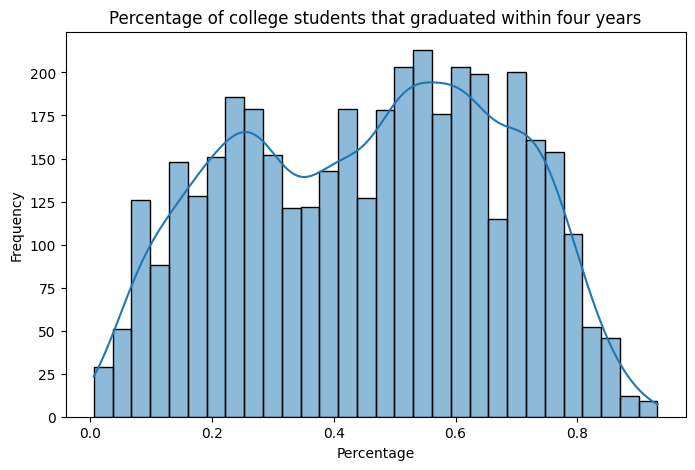

In [ ]:
##Exploratory data analysis- looking at distributions for target varaiable as well as features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["DEP_COMP_ORIG_YR4_RT"], kde=True, bins=30)
plt.title("Percentage of college students that graduated within four years")
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.show()

##Example of bimodal data for feature: Percentage of college students that graduated within four years. Imputation of null values for this feature 
##will be discussed later in the code

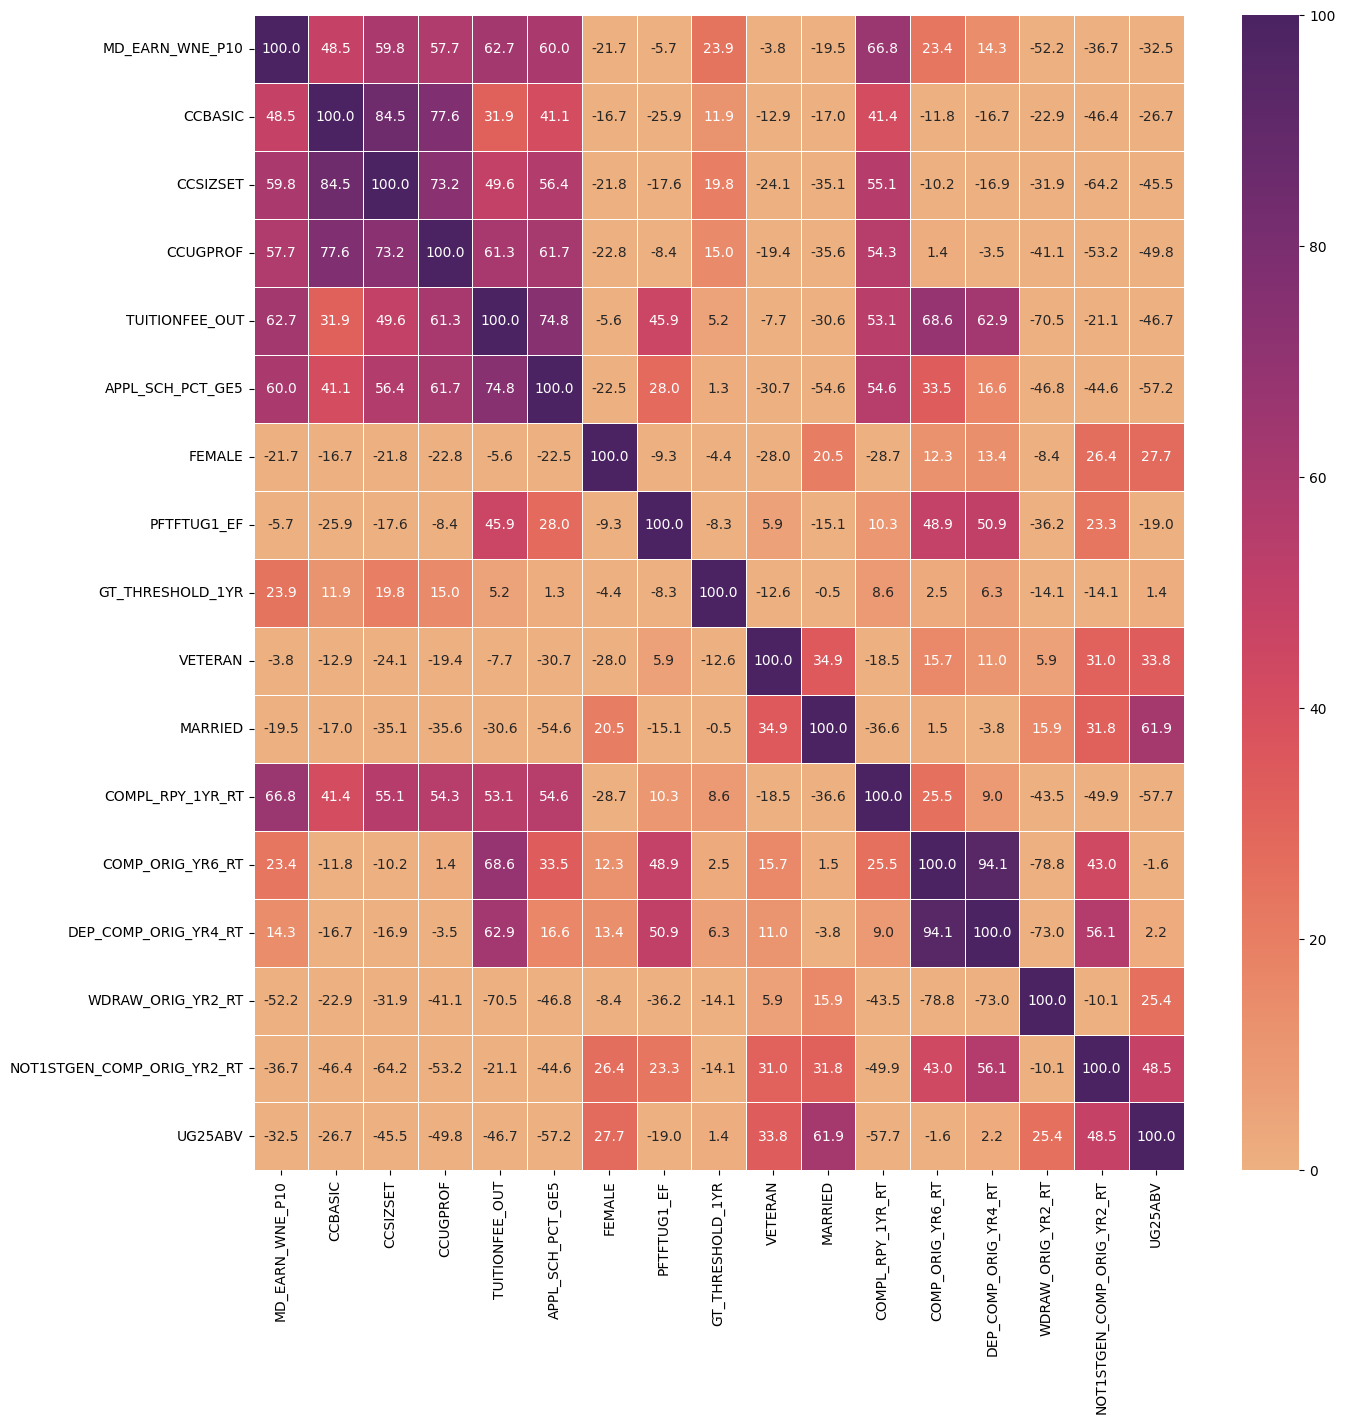

In [ ]:
##Create heatmap to better visualize feature correlations
matrix = train.corr(numeric_only=True)*100
plt.figure(figsize = (15,15))
sns.heatmap(matrix, annot = True, linewidth = .5, vmin = 0, vmax = 100, fmt =".1f", cmap = sns.color_palette("flare", as_cmap = True))
plt.show()

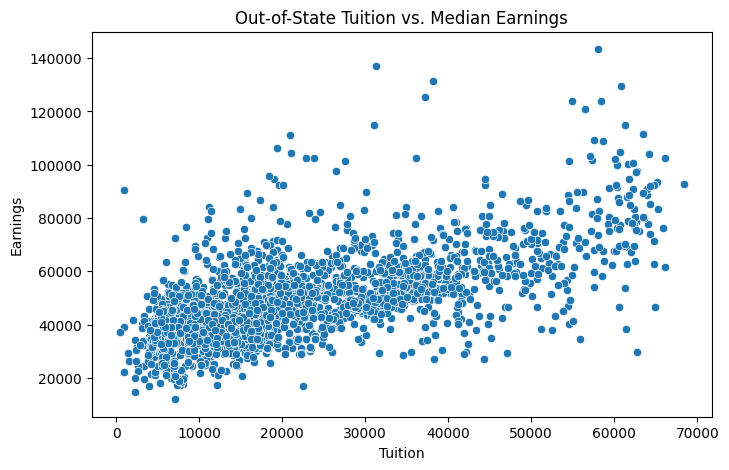

In [ ]:
#Plotting single features against target variable to look at interaction
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train, x="TUITIONFEE_OUT", y="MD_EARN_WNE_P10")
plt.title("Out-of-State Tuition vs. Median Earnings")
plt.xlabel("Tuition")
plt.ylabel("Earnings")
plt.show()

In [9]:
##looking for na values per column. Have already removed instances where target cariable was equal to zero. Zip code has 0 NA values, will look to impute others
df.isna().sum()


MD_EARN_WNE_P10                  0
CCBASIC                        437
CCSIZSET                       437
CCUGPROF                       437
TUITIONFEE_OUT                1834
APPL_SCH_PCT_GE5              1240
FEMALE                         508
PFTFTUG1_EF                    647
ZIP                              0
GT_THRESHOLD_1YR               590
VETERAN                       3132
MARRIED                        602
COMPL_RPY_1YR_RT              1056
COMP_ORIG_YR6_RT               354
DEP_COMP_ORIG_YR4_RT          1398
WDRAW_ORIG_YR2_RT              904
NOT1STGEN_COMP_ORIG_YR2_RT    2121
UG25ABV                        537
dtype: int64

In [ ]:
#Funtion created to drop all instances with NULL values in specified columns, if none then drops all null values
def dropNull(df,subset = None,y_col = 'MD_EARN_WNE_P10'):
    
    #temp_df = df.copy().dropna(axis=0,subset = subset).reset_index()
    temp_df = df.copy().dropna(axis=0,subset = subset)
    if subset == None: 
        temp_df = temp_df.reset_index()
    X_dropped = temp_df.drop(columns=y_col, axis = 1).copy()
    y_dropped = temp_df[y_col].copy()
    return X_dropped,y_dropped

In [ ]:
#Train test split for nonull data
X_train_no_null,y_train_no_null = dropNull(train.select_dtypes(include=["float64"]).copy())
X_test_no_null,y_test_no_null = dropNull(test.select_dtypes(include=["float64"]).copy())

In [ ]:
##Data imputation function
from sklearn.impute import SimpleImputer
class bimodalImputer():
    def __init__(self,method = "drop"):
        self.median_impute = ['COMP_ORIG_YR6_RT','DEP_COMP_ORIG_YR4_RT','TUITIONFEE_OUT','APPL_SCH_PCT_GE5','FEMALE','PFTFTUG1_EF','NOT1STGEN_COMP_ORIG_YR2_RT','MARRIED','VETERAN','GT_THRESHOLD_1YR']
        self.bimodal_cols = ['COMP_ORIG_YR6_RT','DEP_COMP_ORIG_YR4_RT']
        if method == 'drop':
            self.median_impute = [item for item in self.median_impute if item not in self.bimodal_cols]
        else: 
            self.bimodal_cols = None
        self.mean_impute = ['UG25ABV','WDRAW_ORIG_YR2_RT','COMPL_RPY_1YR_RT']
        self.not_app_impute = ['CCSIZSET','CCUGPROF']
        self.zero_impute = ['CCBASIC']

        self.imputer_mean = SimpleImputer(strategy="mean")
        self.imputer_median = SimpleImputer(strategy="median")
        self.imputer_zero = SimpleImputer(strategy  = 'constant',fill_value=0)
        self.imputer_not_app = SimpleImputer(strategy  = 'constant',fill_value=-2)
    ##Fit Transform
    def fit_transform(self,df):
        if self.bimodal_cols is not None:
            X_temp,y_temp = dropNull(df,self.bimodal_cols)
        else: 
            X_temp = df.copy()

        X_temp[self.mean_impute] = self.imputer_mean.fit_transform(X_temp[self.mean_impute])
        X_temp[self.median_impute] = self.imputer_median.fit_transform(X_temp[self.median_impute])
        X_temp[self.zero_impute] = self.imputer_zero.fit_transform(X_temp[self.zero_impute])
        X_temp[self.not_app_impute] = self.imputer_not_app.fit_transform(X_temp[self.not_app_impute])

        if self.bimodal_cols is not None:
            return X_temp, y_temp 
        
        return X_temp
##Transform
    def tranform(self,df):
        if self.bimodal_cols is not None:
            X_temp,y_temp = dropNull(df,self.bimodal_cols)
        else: 
            X_temp = df.copy()

        X_temp[self.mean_impute] = self.imputer_mean.transform(X_temp[self.mean_impute])
        X_temp[self.median_impute] = self.imputer_median.transform(X_temp[self.median_impute])
        X_temp[self.zero_impute] = self.imputer_zero.transform(X_temp[self.zero_impute])
        X_temp[self.not_app_impute] = self.imputer_not_app.transform(X_temp[self.not_app_impute])
        
        if self.bimodal_cols is not None:
            return X_temp, y_temp 
        
        return X_temp


In [ ]:
##Handle Bimodal Data- with dropped null values
bimodal_dropped= bimodalImputer()
X_train_bimodal_dropped,y_train_bimodal_dropped = bimodal_dropped.fit_transform(train.select_dtypes(include=["float64"]).copy())
X_test_bimodal_dropped,y_test_bimodal_dropped = bimodal_dropped.fit_transform(test.select_dtypes(include=["float64"]).copy())

In [ ]:
#Imputing null values
bimodal_imp= bimodalImputer(method = "impute")
X_train_bimodal_imp = bimodal_imp.fit_transform(X_train.select_dtypes(include=["float64"]).copy())
X_test_bimodal_imp = bimodal_imp.tranform(X_test.select_dtypes(include=["float64"]).copy())

In [ ]:
#Check count of NAs
X_train.isna().value_counts()

INSTNM  CCBASIC  CCSIZSET  CCUGPROF  TUITIONFEE_OUT  APPL_SCH_PCT_GE5  FEMALE  PFTFTUG1_EF  GT_THRESHOLD_1YR  VETERAN  MARRIED  COMPL_RPY_1YR_RT  COMP_ORIG_YR6_RT  DEP_COMP_ORIG_YR4_RT  WDRAW_ORIG_YR2_RT  NOT1STGEN_COMP_ORIG_YR2_RT  UG25ABV
False   False    False     False     False           False             False   False        False             False    False    False             False             False                 False              False                       False      884
                                                                                                              True     False    False             False             False                 False              False                       False      609
                                     True            False             False   False        False             False    False    False             False             False                 False              False                       False      330
        True   

In [18]:
##check variance inflation rate
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
#Selecting only numeric features
X_train_numeric = X_train_bimodal_dropped.select_dtypes(include=["float64"]).copy()
X_test_numeric = X_test_bimodal_dropped.select_dtypes(include=["float64"]).copy()

In [12]:

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_numeric.values, i)
                   for i in range(X_train_numeric.shape[1])]

# Sort by VIF descending
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

                       feature        VIF
11            COMP_ORIG_YR6_RT  64.577460
12        DEP_COMP_ORIG_YR4_RT  55.822227
10            COMPL_RPY_1YR_RT  15.855886
5                       FEMALE  15.169990
2                     CCUGPROF  14.016590
6                  PFTFTUG1_EF  11.682833
0                      CCBASIC  10.970388
3               TUITIONFEE_OUT  10.941894
1                     CCSIZSET  10.531906
13           WDRAW_ORIG_YR2_RT   9.948084
15                     UG25ABV   8.372385
9                      MARRIED   7.132061
14  NOT1STGEN_COMP_ORIG_YR2_RT   6.061540
4             APPL_SCH_PCT_GE5   5.163323
8                      VETERAN   3.234130
7             GT_THRESHOLD_1YR   1.401114


In [20]:
##Scale the data

from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

transformer = FunctionTransformer(np.log1p, feature_names_out='one-to-one')
preprocessing = Pipeline([
    #("log", transformer),
    ("standardize", StandardScaler()),
    ('pca', PCA(n_components=.80))
])

trans_data = preprocessing.fit_transform(X_train_no_null,y_train_no_null)

In [41]:
trans_data

array([[-2.13964907,  0.07112724, -0.1140276 , -0.01876368, -0.94859118,
        -0.00654463],
       [ 1.66654824, -1.45858417,  1.21526751,  0.59981746,  0.07585073,
        -0.68734404],
       [-2.95996881, -0.46206609,  0.40258851,  0.71580252, -0.03540291,
         1.56402489],
       ...,
       [ 1.27274111, -1.03694764, -1.81368599,  0.04000388, -0.91645551,
         0.5415705 ],
       [ 0.91545405, -0.26409453,  0.11229238,  0.56532229, -0.49604298,
         1.29138572],
       [ 2.02278228,  0.31885819, -1.40559089,  0.92898741, -0.57838796,
        -1.06102718]])

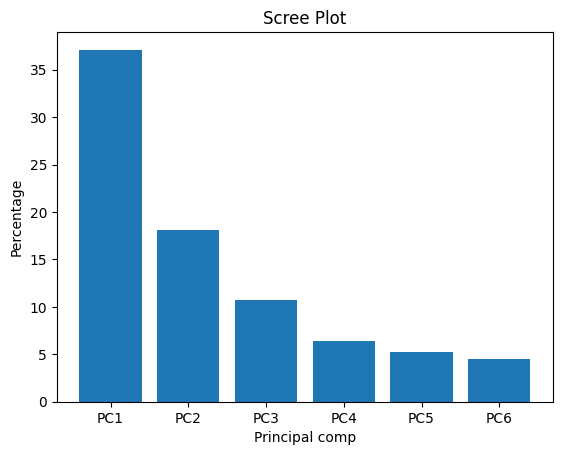

In [42]:
# Multiply explained by 100 and round
per_var = np.round(preprocessing[1].explained_variance_ratio_ * 100, decimals=1)
# Create labels for barplot
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree Plot')

plt.show() 

In [38]:
sum(per_var)

np.float64(82.00000000000001)

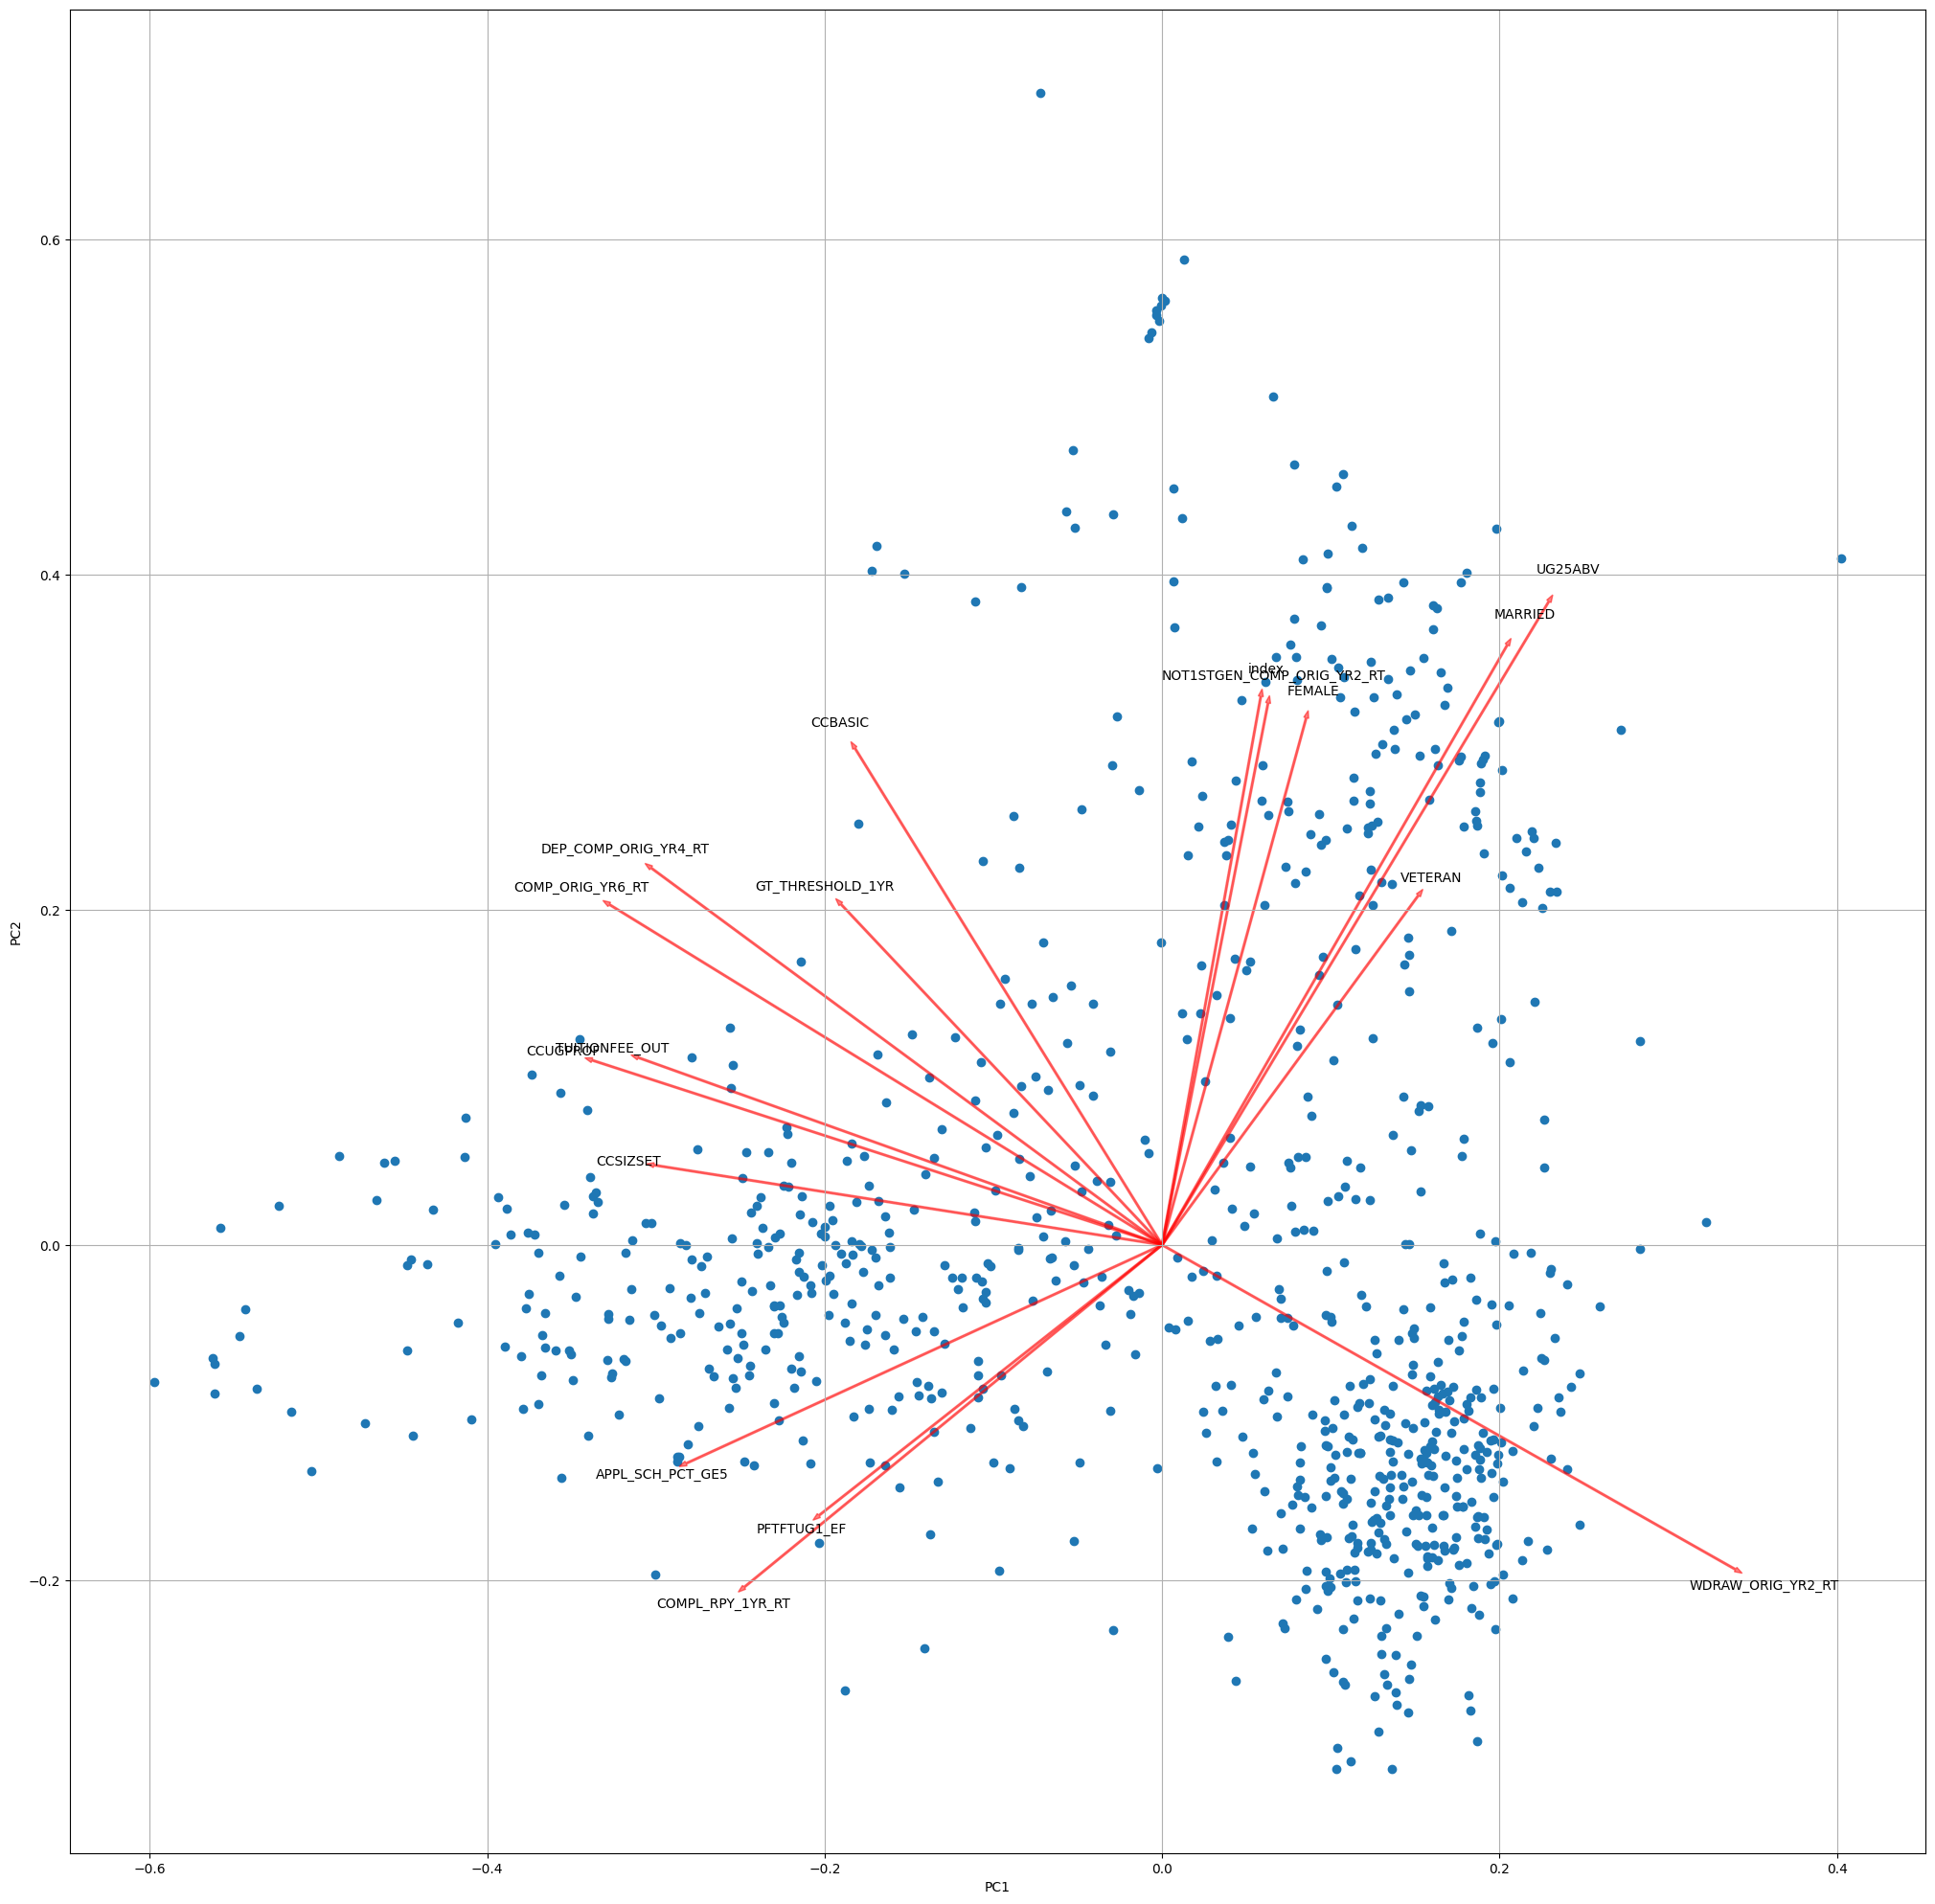

In [ ]:
#Plot the loadings visual
def myplot(pca_data, pca_components, labels):
    # Grab first two principal components
    principal_component_1 = pca_data[:, 0]
    principal_component_2 = pca_data[:, 1]
    n = pca_components.shape[0]
    # Scale the x and y to make the loadings easier to see
    scalex = 1.0/(principal_component_1.max() - principal_component_1.min())
    scaley = 1.0/(principal_component_2.max() - principal_component_2.min())
    plt.figure(figsize=(25,25))
    plt.scatter(principal_component_1 * scalex,principal_component_2 * scaley)
    for i in range(n):
        # Plot an arrow for each component weight
        plt.arrow(0,
                  0,
                  pca_components[i, 0],
                  pca_components[i, 1],
                  color='r',
                  alpha=0.5)
        # Plot the name of the component (use 1.15 to plot the text slightly above the arrow)
        plt.text(pca_components[i, 0] * 1.05,
                 pca_components[i, 1] * 1.05,
                 labels[i],
                 ha='center',
                 va='center')


    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()
    
# Call the function. Use only the 2 PCs.
myplot(trans_data, preprocessing[1].components_.T, labels=X_train_no_null.columns)

loadings for first principal component


In [ ]:

#Get the PCA object
pca_model = preprocessing.named_steps['pca']

#Get the loadings(components_)
loadings = pca_model.components_[0]

#Create a table
weights = pd.Series(loadings,index=X_train_no_null.columns).sort_values()



In [ ]:
#Selecting features with >= 0.2
important_features = weights[weights.abs() >= 0.2].sort_values()
print(important_features)

CCUGPROF               -0.337905
COMP_ORIG_YR6_RT       -0.327644
TUITIONFEE_OUT         -0.310592
DEP_COMP_ORIG_YR4_RT   -0.302894
CCSIZSET               -0.301255
APPL_SCH_PCT_GE5       -0.282167
COMPL_RPY_1YR_RT       -0.247756
PFTFTUG1_EF            -0.203440
MARRIED                 0.204608
UG25ABV                 0.229249
WDRAW_ORIG_YR2_RT       0.339891
dtype: float64


In [ ]:
#Convert to list to get feature names
important_features = list(important_features.index)

In [ ]:
#Check
important_features

['CCUGPROF',
 'COMP_ORIG_YR6_RT',
 'TUITIONFEE_OUT',
 'DEP_COMP_ORIG_YR4_RT',
 'CCSIZSET',
 'APPL_SCH_PCT_GE5',
 'COMPL_RPY_1YR_RT',
 'PFTFTUG1_EF',
 'MARRIED',
 'UG25ABV',
 'WDRAW_ORIG_YR2_RT']

In [ ]:
#Subset data will just important features
X_train_important = X_train_no_null[important_features]
X_test_important = X_test_no_null[important_features]

random forest with important features

In [48]:
#finding best parameters for random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid_important= {
    'n_estimators': np.arange(start=100,stop=250,step=5),
    'max_depth': np.arange(start=5,stop=10,step=1),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': np.arange(start=5,stop=10,step = 1),
    'min_samples_leaf': np.arange(start=2,stop=5,step = 1)
}
rf_model_important= RandomForestRegressor()
cv_opt_important = GridSearchCV(rf_model_important,
                      param_grid=param_grid_important,
                      scoring='neg_mean_squared_error',
                      cv=5,
                      n_jobs=-1,
                      verbose=1,
                      return_train_score=True
                      )

cv_opt_important.fit(X_train_important, y_train_no_null)

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


c:\Users\riley\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [54]:
best_p_important = cv_opt_important.best_params_
rnd_clf_important = RandomForestRegressor(n_estimators=best_p_important['n_estimators'],
                                max_depth = best_p_important['max_depth'],
                                max_features=best_p_important['max_features'],
                                min_samples_leaf=best_p_important['min_samples_leaf'],
                                min_samples_split=best_p_important['min_samples_split'],
                               
                                 n_jobs=-1, random_state=42)
rnd_clf_important.fit(X_train_important,y_train_no_null)


RandomForestRegressor(max_depth=np.int64(9), max_features='sqrt',
                      min_samples_leaf=np.int64(2),
                      min_samples_split=np.int64(5), n_estimators=np.int64(185),
                      n_jobs=-1, random_state=42)

In [55]:
#calculating the error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
y_pred_important = rnd_clf_important.predict(X_test_important)

rmse_important = root_mean_squared_error(y_test_no_null, y_pred_important)
mse_important = mean_squared_error(y_test_no_null, y_pred_important)
print(f"rmse: {rmse_important}")
print(f"mse: {mse_important}")

rmse: 4275.541479289036
mse: 18280254.941121075


In [ ]:
#Save score data for later for comparison with other models
model_scores = pd.DataFrame(columns=["model","train_or_test","mse","r^2"])

In [ ]:
#Appending scores for this model to last row table
model_scores.loc[len(model_scores) + 1] = ["random_forest_important_features","test",mse_important,np.nan]

drop all null values for random forest

In [49]:
#finding best parameters for random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid_no_null= {
    'n_estimators': np.arange(start=100,stop=250,step=5),
    'max_depth': np.arange(start=5,stop=10,step=1),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': np.arange(start=5,stop=10,step = 1),
    'min_samples_leaf': np.arange(start=2,stop=5,step = 1)
}
rf_model_no_null= RandomForestRegressor()
cv_opt_no_null = GridSearchCV(rf_model_no_null,
                      param_grid=param_grid_no_null,
                      scoring='neg_mean_squared_error',
                      cv=5,
                      n_jobs=-1,
                      verbose=1,
                      return_train_score=True
                      )

cv_opt_no_null.fit(X_train_no_null, y_train_no_null)

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


c:\Users\riley\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [59]:
best_p_no_null = cv_opt_no_null.best_params_
rnd_clf_no_null = RandomForestRegressor(n_estimators=best_p_no_null['n_estimators'],
                                max_depth = best_p_no_null['max_depth'],
                                max_features=best_p_no_null['max_features'],
                                min_samples_leaf=best_p_no_null['min_samples_leaf'],
                                min_samples_split=best_p_no_null['min_samples_split'],
                               
                                 n_jobs=-1, random_state=42)
rnd_clf_no_null.fit(X_train_no_null,y_train_no_null)


RandomForestRegressor(max_depth=np.int64(9), max_features='sqrt',
                      min_samples_leaf=np.int64(2),
                      min_samples_split=np.int64(7), n_estimators=np.int64(190),
                      n_jobs=-1, random_state=42)

In [60]:
#calculating the error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
y_pred_no_null = rnd_clf_no_null.predict(X_test_no_null)

rmse_no_null = root_mean_squared_error(y_test_no_null, y_pred_no_null)
mse_no_null = mean_squared_error(y_test_no_null, y_pred_no_null)
print(f"rmse: {rmse_no_null}")
print(f"mse: {mse_no_null}")

rmse: 4118.686581954741
mse: 16963579.160374027


In [ ]:
#Appending scores for this model to last row table
model_scores.loc[len(model_scores) + 1] = ["random_forest_no_null","test",mse_no_null,np.nan]

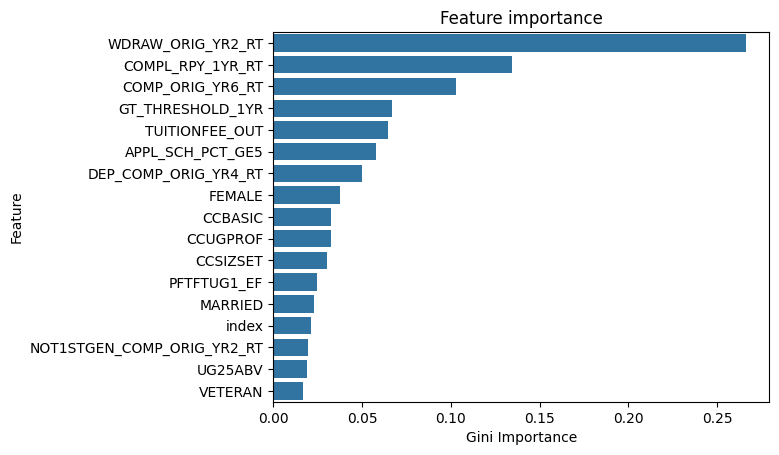

In [ ]:
#Plot feature importance
import seaborn as sns
import matplotlib.pyplot as plt
import shap
feature_names = list(X_train_no_null.columns)
importances_no_null = rnd_clf_no_null.feature_importances_
feature_no_null_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances_no_null}).sort_values('Gini Importance', ascending=False) 
sns.barplot(data=feature_no_null_df, x='Gini Importance', y='Feature')
plt.title("Feature importance")
plt.show()

Test random forest on bimodals with dropped values

In [50]:
#finding best parameters for random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid_dropped = {
    'n_estimators': np.arange(start=100,stop=250,step=5),
    'max_depth': np.arange(start=5,stop=10,step=1),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': np.arange(start=5,stop=10,step = 1),
    'min_samples_leaf': np.arange(start=2,stop=5,step = 1)
}
rf_model_dropped = RandomForestRegressor()
cv_opt_dropped = GridSearchCV(rf_model_dropped,
                      param_grid=param_grid_dropped,
                      scoring='neg_mean_squared_error',
                      cv=5,
                      n_jobs=-1,
                      verbose=1,
                      return_train_score=True
                      )

cv_opt_dropped.fit(X_train_bimodal_dropped, y_train_bimodal_dropped)

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [63]:
best_p_dropped = cv_opt_dropped.best_params_
rnd_clf_dropped = RandomForestRegressor(n_estimators=best_p_dropped ['n_estimators'],
                                max_depth = best_p_dropped ['max_depth'],
                                max_features=best_p_dropped ['max_features'],
                                min_samples_leaf=best_p_dropped ['min_samples_leaf'],
                                min_samples_split=best_p_dropped ['min_samples_split'],
                               
                                 n_jobs=-1, random_state=42)
rnd_clf_dropped.fit(X_train_bimodal_dropped,y_train_bimodal_dropped)


RandomForestRegressor(max_depth=np.int64(9), max_features='log2',
                      min_samples_leaf=np.int64(2),
                      min_samples_split=np.int64(5), n_estimators=np.int64(200),
                      n_jobs=-1, random_state=42)

In [64]:
#calculating the error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
y_pred_dropped = rnd_clf_dropped.predict(X_test_bimodal_dropped)

rmse_dropped = root_mean_squared_error(y_test_bimodal_dropped, y_pred_dropped)
mse_dropped = mean_squared_error(y_test_bimodal_dropped, y_pred_dropped)
print(f"rmse: {rmse_dropped}")
print(f"mse: {mse_dropped}")

rmse: 5815.017797456457
mse: 33814431.98473534


In [ ]:
#Appending scores for this model to last row table
model_scores.loc[len(model_scores) + 1] = ["random_forest_bimodal_dropped","test",mse_dropped,np.nan]

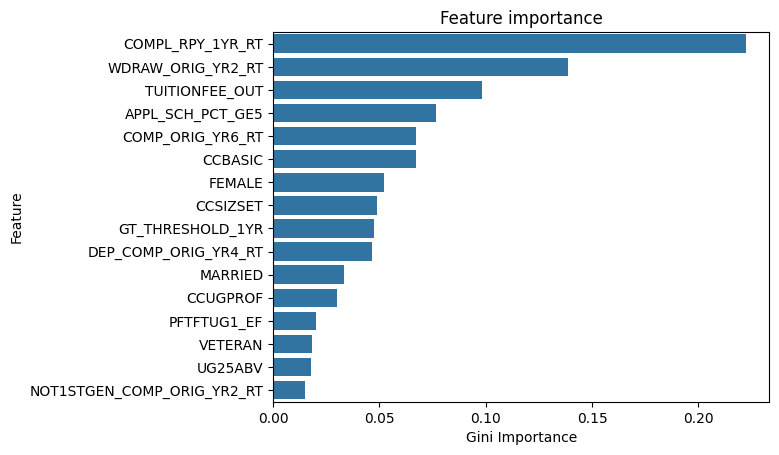

In [ ]:
#Plot feature importance
import seaborn as sns
import matplotlib.pyplot as plt
import shap
feature_names = list(X_train_bimodal_dropped.columns)
importances_dropped = rnd_clf_dropped.feature_importances_
feature_dropped_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances_dropped}).sort_values('Gini Importance', ascending=False) 
sns.barplot(data=feature_dropped_df, x='Gini Importance', y='Feature')
plt.title("Feature importance")
plt.show()

random forest for imputed bimodal

In [53]:
#finding best parameters for random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid_imp = {
    'n_estimators': np.arange(start=100,stop=250,step=5),
    'max_depth': np.arange(start=5,stop=10,step=1),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': np.arange(start=5,stop=10,step = 1),
    'min_samples_leaf': np.arange(start=2,stop=5,step = 1)
}
rf_model_imp = RandomForestRegressor()
cv_opt_imp = GridSearchCV(rf_model_imp,
                      param_grid=param_grid_imp,
                      scoring='neg_mean_squared_error',
                      cv=5,
                      n_jobs=-1,
                      verbose=1,
                      return_train_score=True
                      )

cv_opt_imp.fit(X_train_bimodal_imp, y_train)

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


c:\Users\riley\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [67]:
best_p_imp = cv_opt_dropped.best_params_
rnd_clf_imp = RandomForestRegressor(n_estimators=best_p_imp['n_estimators'],
                                max_depth = best_p_imp['max_depth'],
                                max_features=best_p_imp['max_features'],
                                min_samples_leaf=best_p_imp['min_samples_leaf'],
                                min_samples_split=best_p_imp['min_samples_split'],
                               
                                 n_jobs=-1, random_state=42)
rnd_clf_imp.fit(X_train_bimodal_imp,y_train)


RandomForestRegressor(max_depth=np.int64(9), max_features='log2',
                      min_samples_leaf=np.int64(2),
                      min_samples_split=np.int64(5), n_estimators=np.int64(200),
                      n_jobs=-1, random_state=42)

In [68]:
#calculating the error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
y_pred_imp = rnd_clf_imp.predict(X_test_bimodal_imp)

rmse_imp = root_mean_squared_error(y_test, y_pred_imp)
mse_imp = mean_squared_error(y_test, y_pred_imp)
print(f"rmse: {rmse_imp}")
print(f"mse: {mse_imp}")

rmse: 8920.75586117737
mse: 79579885.13473038


In [ ]:
#Appending scores for this model to last row table
model_scores.loc[len(model_scores) + 1] = ["random_forest_bimodal_imp","test",mse_imp,np.nan]

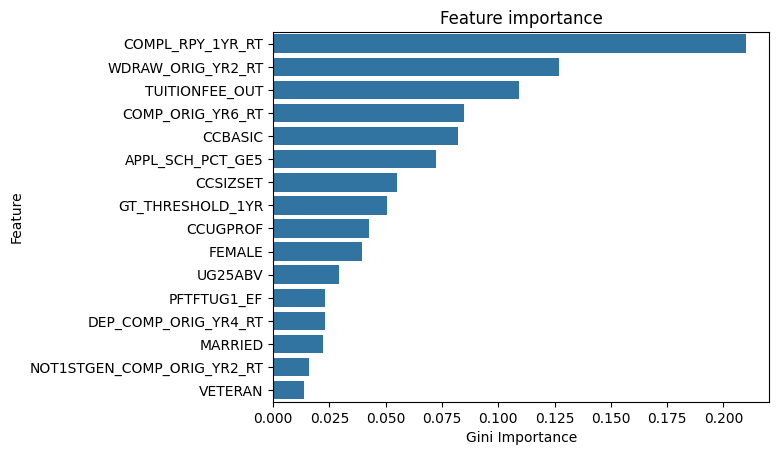

In [ ]:
#Plot the feature importance
import seaborn as sns
import matplotlib.pyplot as plt
import shap
feature_names = list(X_train_bimodal_imp.columns)
importances = rnd_clf_imp.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
sns.barplot(data=feature_imp_df, x='Gini Importance', y='Feature')
plt.title("Feature importance")
plt.show()

In [ ]:
#Import Packages
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, add_dummy_feature
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

Lasso regression for all features on the test data

In [26]:
alphas = np.logspace(-5.5, 10, 50)
lasso_no_null = LassoCV(alphas = alphas, cv=5, random_state=42)
lasso_no_null.fit(X_train_no_null, y_train_no_null)

LassoCV(alphas=array([3.16227766e-06, 6.55128557e-06, 1.35722878e-05, 2.81176870e-05,
       5.82513671e-05, 1.20679264e-04, 2.50011038e-04, 5.17947468e-04,
       1.07303094e-03, 2.22299648e-03, 4.60537826e-03, 9.54095476e-03,
       1.97659807e-02, 4.09491506e-02, 8.48342898e-02, 1.75751062e-01,
       3.64103195e-01, 7.54312006e-01, 1.56270698e+00, 3.23745754e+00,
       6.70703561e+00, 1.38949549e+0...
       2.27584593e+03, 4.71486636e+03, 9.76778110e+03, 2.02358965e+04,
       4.19226744e+04, 8.68511374e+04, 1.79929362e+05, 3.72759372e+05,
       7.72244995e+05, 1.59985872e+06, 3.31442475e+06, 6.86648845e+06,
       1.42252931e+07, 2.94705170e+07, 6.10540230e+07, 1.26485522e+08,
       2.62039853e+08, 5.42867544e+08, 1.12465782e+09, 2.32995181e+09,
       4.82695744e+09, 1.00000000e+10]),
        cv=5, random_state=42)

In [27]:

# Predict on test set
y_pred_lasso_no_null_test = lasso_no_null.predict(X_test_no_null)

# Evaluate
mse_lasso_no_null_test = mean_squared_error(y_test_no_null, y_pred_lasso_no_null_test)
r2_lasso_no_null_test = r2_score(y_test_no_null, y_pred_lasso_no_null_test)

print(" Lasso Regression Performance:")
print(f" Best alpha: {lasso_no_null.alpha_:.4f}")
print(f"MSE: {mse_lasso_no_null_test:.2f}")
print(f"R^2: {r2_lasso_no_null_test:.3f}")


 Lasso Regression Performance:
 Best alpha: 3.2375
MSE: 42586891.87
R^2: 0.775


In [ ]:
#Appending scores for this model to last row table
model_scores.loc[len(model_scores) + 1] = ["lasso_no_null","test",mse_lasso_no_null_test,r2_lasso_no_null_test]

In [ ]:

# Predict on train set
y_pred_lasso_no_null_train = lasso_no_null.predict(X_train_no_null)

# Evaluate
mse_lasso_no_null_train = mean_squared_error(y_train_no_null, y_pred_lasso_no_null_train)
r2_lasso_no_null_train = r2_score(y_train_no_null, y_pred_lasso_no_null_train)

print(" Lasso Regression Performance:")
print(f" Best alpha: {lasso_no_null.alpha_:.4f}")
print(f"MSE: {mse_lasso_no_null_train:.2f}")
print(f"R^2: {r2_lasso_no_null_train:.3f}")

 Lasso Regression Performance:
 Best alpha: 3.2375
MSE: 43776670.76
R^2: 0.746


In [ ]:
#Appending scores for this model to last row table 
model_scores.loc[len(model_scores) + 1] = ["lasso_no_null","train",mse_lasso_no_null_train,r2_lasso_no_null_train]

Lasso Regression using only "important" features found during PCA

In [29]:
alphas = np.logspace(-5.5, 10, 50)
lasso_important = LassoCV(alphas = alphas, cv=5, random_state=42)
lasso_important.fit(X_train_important, y_train_no_null)


# Predict on test set
y_pred_lasso_important = lasso_important.predict(X_test_important)


# Evaluate
mse_lasso_important = mean_squared_error(y_test_no_null, y_pred_lasso_important)
r2_lasso_important = r2_score(y_test_no_null, y_pred_lasso_important)


print(" Lasso Regression Performance:")
print(f" Best alpha: {lasso_important.alpha_:.4f}")
print(f"MSE: {mse_lasso_important:.2f}")
print(f"R^2: {r2_lasso_important:.3f}")

 Lasso Regression Performance:
 Best alpha: 0.0000
MSE: 45840826.33
R^2: 0.758


In [ ]:
#Appending scores for this model to last row table
model_scores.loc[len(model_scores) + 1] = ["lasso_important","test",mse_lasso_important,r2_lasso_important]

lasso prediction examples using all features (SELECTED MODEL)


In [ ]:
#Random sample from test set (3 samples)
samples = test.dropna().sample(n=3).reset_index()


In [116]:
samples.to_csv("prediction_samples.csv")

In [130]:
samples_df = pd.read_csv("prediction_samples.csv",index_col="Unnamed: 0")

In [131]:
samples_df

,index,INSTNM,MD_EARN_WNE_P10,CCBASIC,CCSIZSET,CCUGPROF,TUITIONFEE_OUT,APPL_SCH_PCT_GE5,FEMALE,PFTFTUG1_EF,GT_THRESHOLD_1YR,VETERAN,MARRIED,COMPL_RPY_1YR_RT,COMP_ORIG_YR6_RT,DEP_COMP_ORIG_YR4_RT,WDRAW_ORIG_YR2_RT,NOT1STGEN_COMP_ORIG_YR2_RT,UG25ABV
0,2389,North Dakota State University-Main Campus,62203.0,15.0,17.0,12.0,15646.0,0.057235,0.478885,0.8132,2654.0,0.003215,0.024437,0.888848,0.576386,0.578947,0.152141,0.139124,0.0636
1,3149,Houston Community College,39254.0,1.0,5.0,1.0,5460.0,0.132780,0.594227,0.3507,1111.0,0.007349,0.124323,0.384113,0.143000,0.130863,0.486627,0.106370,0.3921
2,3690,Aviation Institute of Maintenance-Philadelphia,42785.0,-2.0,-2.0,-2.0,16757.0,0.041575,0.085339,1.0000,81.0,0.024070,0.137856,0.255507,0.470339,0.372549,0.461538,0.500000,0.5331


In [ ]:
#Call predict on samples- remove institutuion name (Categorical) and target variable
X_samples = samples.drop(columns=["INSTNM","MD_EARN_WNE_P10"])
Y_pred_samples = lasso_no_null.predict(X_samples)

In [ ]:
#Create function to create a table to compare prediction versus actual target variable (median earnings)
def compare_values(original,prediction):
    predicted_values = pd.DataFrame(columns=['original_index','INSTITUTION_NAME','ACTUAL_MEDIAN_EARNINGS',"PREDICTED_MEDIAN_EARNINGS"])
    predicted_values['original_index'] = original['index']
    predicted_values['INSTITUTION_NAME'] = original['INSTNM']
    predicted_values['ACTUAL_MEDIAN_EARNINGS'] = original["MD_EARN_WNE_P10"]
    predicted_values['PREDICTED_MEDIAN_EARNINGS'] = prediction
    return predicted_values

In [170]:
predicted_values = compare_values(samples_df,Y_pred_samples)

In [171]:
predicted_values

,original_index,INSTITUTION_NAME,ACTUAL_MEDIAN_EARNINGS,PREDICTED_MEDIAN_EARNINGS
0,2389,North Dakota State University-Main Campus,62203.0,56916.085745
1,3149,Houston Community College,39254.0,36462.499992
2,3690,Aviation Institute of Maintenance-Philadelphia,42785.0,33716.944258


In [147]:
predicted_values.to_csv("predicted_values.csv")

In [148]:
predicted_values = pd.read_csv("predicted_values.csv",index_col="Unnamed: 0")

In [ ]:
##Create Visual
import textwrap

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        wrapped_text = textwrap.fill(text, width=width, break_long_words=break_long_words)
        labels.append(wrapped_text)
    ax.set_xticklabels(labels, rotation=0, ha='center')

def plot_predictions(w,predicted_values):
    # Bar width and x locations
    x = np.arange(len(predicted_values))

    fig, ax = plt.subplots()

    ax.bar(x-w/2, predicted_values["ACTUAL_MEDIAN_EARNINGS"], width=w, label='actual')
    ax.bar(x+w/2, predicted_values["PREDICTED_MEDIAN_EARNINGS"], width=w, label='predicted')

    ax.set_xticks(x,predicted_values["INSTITUTION_NAME"],wrap=True)
    #ax.set_xticklabels(predicted_values["INSTITUTION_NAME"])
    ax.set_xlabel("COLLEGE NAME")
    ax.set_ylabel('MEDIAN EARNINGS')
    ax.set_title('PREDICTION VS ACTUAL MEDIAN EARNINGS OF COLLEGES')
    ax.legend()

    wrap_labels(ax, 10)

    plt.show()

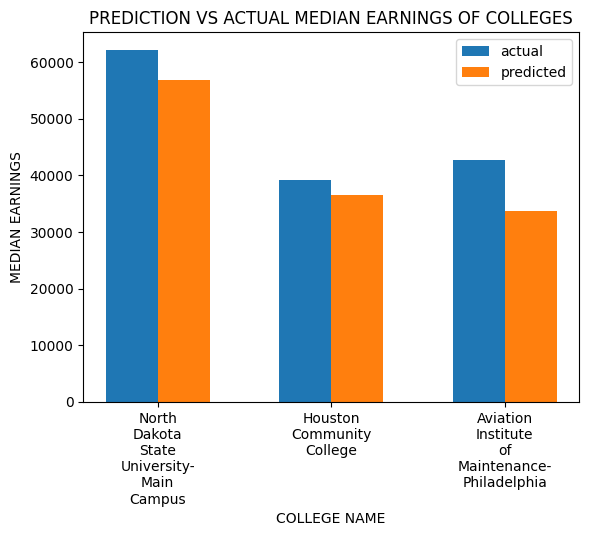

In [ ]:
plot_predictions(0.3,predicted_values)

Prediction on Synthesized Data

In [ ]:
#Read in csv that we created with synthesized colleges
synthesized_samples = pd.read_csv("Synthesizedexamples.csv")

In [70]:
X_synthesized_samples = synthesized_samples.drop(columns=["INSTNM","MD_EARN_WNE_P10"])
Y_pred_synthesized_samples = lasso_no_null.predict(X_synthesized_samples)

In [71]:
predicted_synthesized_samples = compare_values(synthesized_samples,Y_pred_synthesized_samples)

In [72]:
predicted_synthesized_samples.to_csv("predicted_synthesized_samples.csv")

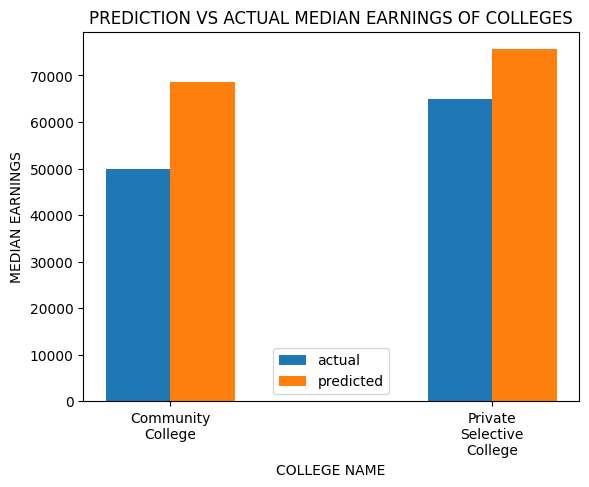

In [73]:
plot_predictions(0.2,predicted_synthesized_samples)

Ridge regression with important features

In [96]:
alphas = np.logspace(-5.5, 10, 50)
ridge_important = RidgeCV(alphas = alphas, cv=5,scoring="r2")
ridge_important.fit(X_train_important, y_train_no_null)


# Predict on test set
y_pred_ridge_important = ridge_important.predict(X_test_important)


# Evaluate
mse_ridge_important = mean_squared_error(y_test_no_null, y_pred_ridge_important)
r2_ridge_important = r2_score(y_test_no_null, y_pred_ridge_important)


print(" Ridge Regression Performance:")
print(f" Best alpha: {ridge_important.alpha_:.4f}")
print(f"MSE: {mse_ridge_important:.2f}")
print(f"R^2: {r2_ridge_important:.3f}")

 Ridge Regression Performance:
 Best alpha: 0.1758
MSE: 46030129.55
R^2: 0.757


In [ ]:
#Appending scores for this model to last row table
model_scores.loc[len(model_scores) + 1] = ["ridge_important","test",mse_ridge_important,r2_ridge_important]

Ridge regression with all features

In [98]:
alphas = np.logspace(-5.5, 10, 50)
ridge = RidgeCV(alphas = alphas, cv=5,scoring="r2")
ridge.fit(X_train_no_null, y_train_no_null)


# Predict on test set
y_pred_ridge = ridge.predict(X_test_no_null)


# Evaluate
mse_ridge = mean_squared_error(y_test_no_null, y_pred_ridge)
r2_ridge = r2_score(y_test_no_null, y_pred_ridge)


print(" Ridge Regression Performance:")
print(f" Best alpha: {ridge.alpha_:.4f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"R^2: {r2_ridge:.3f}")

 Ridge Regression Performance:
 Best alpha: 0.3641
MSE: 42704921.96
R^2: 0.774


In [ ]:
#Appending scores for this model to last row table
model_scores.loc[len(model_scores) + 1] = ["ridge_no_null","test",mse_ridge,r2_ridge]

In [101]:
model_scores.to_csv("model_scores.csv")

Stepwise Linear Regression

In [27]:
import statsmodels.api as sm
import pandas as pd

# Use your original numeric feature set, no PCA
X_train_stepwise = X_train_numeric.copy()
y_train_stepwise = y_train_bimodal_dropped.copy()
X_test_stepwise = X_test_numeric.copy()
y_test_stepwise = y_test_bimodal_dropped.copy()

# Start with no features
selected_features = []
remaining_features = list(X_train_stepwise.columns)

In [28]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train_stepwise)
X_test_scaled = scaler.transform(X_test_stepwise)

# Convert back to DataFrames to preserve column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_stepwise.columns, index=X_train_stepwise.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_stepwise.columns, index=X_test_stepwise.index)

In [ ]:

# Add constant (intercept) after scaling
X_train_final = sm.add_constant(X_train_scaled_df)

#  Fit the regression model
model = sm.OLS(y_train_stepwise, X_train_final).fit()



In [ ]:
#Funtion to perform stepwise linear regression
def forward_stepwise(X, y, verbose=True):

    X = X.copy().reset_index(drop=True)
    y = y.copy().reset_index(drop=True)

    selected = []
    remaining = list(X.columns)
    current_score, best_new_score = float('inf'), float('inf')

    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            features = selected + [candidate]
            X_model = sm.add_constant(X[features])
            model = sm.OLS(y, X_model).fit()
            aic = model.aic
            scores_with_candidates.append((aic, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]

        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            if verbose:
                print(f"✅ Added: {best_candidate} | AIC: {best_new_score:.2f}")
        else:
            break

    return selected


In [31]:
final_features = forward_stepwise(X_train_scaled_df, y_train_stepwise, remaining_features.copy())

✅ Added: COMPL_RPY_1YR_RT | AIC: 68305.50
✅ Added: TUITIONFEE_OUT | AIC: 67732.31
✅ Added: GT_THRESHOLD_1YR | AIC: 67441.79
✅ Added: PFTFTUG1_EF | AIC: 67250.54
✅ Added: APPL_SCH_PCT_GE5 | AIC: 67081.13
✅ Added: WDRAW_ORIG_YR2_RT | AIC: 66949.30
✅ Added: FEMALE | AIC: 66773.34
✅ Added: MARRIED | AIC: 66664.28
✅ Added: CCSIZSET | AIC: 66618.15
✅ Added: NOT1STGEN_COMP_ORIG_YR2_RT | AIC: 66597.47
✅ Added: VETERAN | AIC: 66581.75
✅ Added: DEP_COMP_ORIG_YR4_RT | AIC: 66570.95
✅ Added: COMP_ORIG_YR6_RT | AIC: 66563.29
✅ Added: CCUGPROF | AIC: 66559.07
✅ Added: UG25ABV | AIC: 66556.70


In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MD_EARN_WNE_P10   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     384.5
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:24:04   Log-Likelihood:                -33262.
No. Observations:                3175   AIC:                         6.656e+04
Df Residuals:                    3158   BIC:                         6.666e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       4.343e+04    152.709    284.373      0.000    4.31e+04    4.37e+04
CCBASIC                      -77.9049    362.954     -0.215      0.830    -789.555     633.745
CCSIZSET                    2278.3240    396.879      5.741      0.000    1500.156    3056.492
CCUGPROF                    -860.0312    462.586     -1.859      0.063   -1767.030      46.968
TUITIONFEE_OUT              2278.2963    261.988      8.696      0.000    1764.612    2791.980
APPL_SCH_PCT_GE5            3874.6950    254.363     15.233      0.000    3375.962    4373.429
FEMALE                     -2169.9090    179.260    -12.105      0.000   -2521.387   -1818.431
PFTFTUG1_EF                -2423.9350    194.296    -12.475      0.000   -2804.894   -2042.976
GT_THRESHOLD_1YR            2403.2372    160.975     14.929      0.000    2087.611    2718.863
VETERAN                      702.8558    175.385      4.007      0.000     358.975    1046.736
MARRIED                     1833.4580    210.047      8.729      0.000    1421.615    2245.301
COMPL_RPY_1YR_RT            5591.4254    216.816     25.789      0.000    5166.312    6016.539
COMP_ORIG_YR6_RT            1437.5587    497.451      2.890      0.004     462.200    2412.918
DEP_COMP_ORIG_YR4_RT       -2252.0475    484.139     -4.652      0.000   -3201.306   -1302.789
WDRAW_ORIG_YR2_RT          -2944.6562    292.215    -10.077      0.000   -3517.606   -2371.707
NOT1STGEN_COMP_ORIG_YR2_RT  1199.0178    223.509      5.365      0.000     760.780    1637.255
UG25ABV                      478.9298    230.912      2.074      0.038      26.178     931.682
==============================================================================
Omnibus:                     1163.267   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12513.446
Skew:                           1.426   Prob(JB):                         0.00
Kurtosis:                      12.298   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
print("\n📌 Final selected features:")
print(final_features)


📌 Final selected features:
['COMPL_RPY_1YR_RT', 'TUITIONFEE_OUT', 'GT_THRESHOLD_1YR', 'PFTFTUG1_EF', 'APPL_SCH_PCT_GE5', 'WDRAW_ORIG_YR2_RT', 'FEMALE', 'MARRIED', 'CCSIZSET', 'NOT1STGEN_COMP_ORIG_YR2_RT', 'VETERAN', 'DEP_COMP_ORIG_YR4_RT', 'COMP_ORIG_YR6_RT', 'CCUGPROF', 'UG25ABV']


In [ ]:
#Look at variance inflation rate
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming X_train_stepwise is your raw (scaled + imputed) numeric data
X_vif = X_train_stepwise.copy()
X_vif = sm.add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data = vif_data.sort_values("VIF", ascending=False)
print(vif_data)


                       Feature         VIF
0                        const  151.852440
12            COMP_ORIG_YR6_RT   10.611284
13        DEP_COMP_ORIG_YR4_RT   10.050967
3                     CCUGPROF    9.175977
2                     CCSIZSET    6.754377
1                      CCBASIC    5.648997
14           WDRAW_ORIG_YR2_RT    3.661607
4               TUITIONFEE_OUT    2.943276
5             APPL_SCH_PCT_GE5    2.774444
16                     UG25ABV    2.286439
15  NOT1STGEN_COMP_ORIG_YR2_RT    2.142188
11            COMPL_RPY_1YR_RT    2.015806
10                     MARRIED    1.891919
7                  PFTFTUG1_EF    1.618809
6                       FEMALE    1.377956
9                      VETERAN    1.319027
8             GT_THRESHOLD_1YR    1.111180


In [ ]:
#Function to remove features with high VIF
def selectFeatures(vif_data,X_train_stepwise,num_predictors):
    temp = vif_data.sort_values("VIF", ascending=True)
    selected = temp[:num_predictors]["Feature"]
    X_cleaned = X_train_stepwise[selected]
    return X_cleaned
    

In [ ]:
#Funtion to get regression model
def getRegressionModel(X_cleaned,y_train_stepwise,remaining_features):
    final_features = forward_stepwise(X_cleaned, y_train_stepwise, remaining_features.copy())
    X_cleaned_final= sm.add_constant(X_cleaned[final_features])
    X_cleaned_final_model = sm.OLS(y_train_stepwise, X_cleaned_final).fit()
    return X_cleaned_final_model

In [95]:
X_cleaned = selectFeatures(vif_data,X_train_stepwise,1)
X_cleaned_final_model = getRegressionModel(X_cleaned,y_train_stepwise,remaining_features)


✅ Added: GT_THRESHOLD_1YR | AIC: 69647.14


In [111]:
r_squared = []
mse_model = []
num_pred = []
num_models = 17 #exclusive
for n in range(1,num_models):
    X_cleaned = selectFeatures(vif_data,X_train_stepwise,n)
    X_cleaned_final_model = getRegressionModel(X_cleaned,y_train_stepwise,remaining_features)
    r_squared.append(X_cleaned_final_model.rsquared)
    mse_model.append(X_cleaned_final_model.mse_model)
    num_pred.append(n)

✅ Added: GT_THRESHOLD_1YR | AIC: 69647.14
✅ Added: GT_THRESHOLD_1YR | AIC: 69647.14
✅ Added: VETERAN | AIC: 69641.77
✅ Added: GT_THRESHOLD_1YR | AIC: 69647.14
✅ Added: FEMALE | AIC: 69451.22
✅ Added: VETERAN | AIC: 69415.86
✅ Added: GT_THRESHOLD_1YR | AIC: 69647.14
✅ Added: FEMALE | AIC: 69451.22
✅ Added: VETERAN | AIC: 69415.86
✅ Added: PFTFTUG1_EF | AIC: 69387.43
✅ Added: GT_THRESHOLD_1YR | AIC: 69647.14
✅ Added: FEMALE | AIC: 69451.22
✅ Added: MARRIED | AIC: 69330.81
✅ Added: PFTFTUG1_EF | AIC: 69266.92
✅ Added: VETERAN | AIC: 69266.89
✅ Added: COMPL_RPY_1YR_RT | AIC: 68305.50
✅ Added: GT_THRESHOLD_1YR | AIC: 68005.92
✅ Added: VETERAN | AIC: 67964.96
✅ Added: PFTFTUG1_EF | AIC: 67931.77
✅ Added: FEMALE | AIC: 67906.85
✅ Added: COMPL_RPY_1YR_RT | AIC: 68305.50
✅ Added: GT_THRESHOLD_1YR | AIC: 68005.92
✅ Added: VETERAN | AIC: 67964.96
✅ Added: PFTFTUG1_EF | AIC: 67931.77
✅ Added: FEMALE | AIC: 67906.85
✅ Added: COMPL_RPY_1YR_RT | AIC: 68305.50
✅ Added: GT_THRESHOLD_1YR | AIC: 68005.92

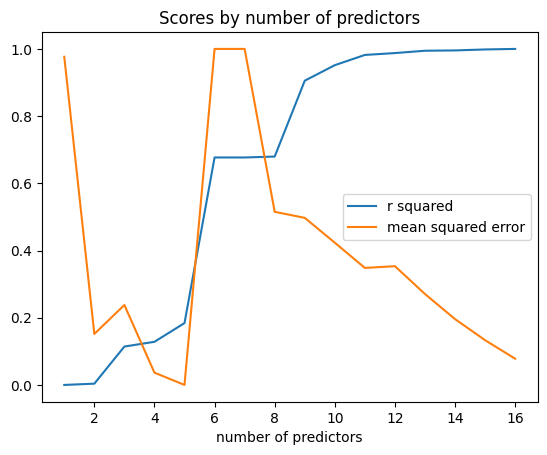

In [ ]:
#Create a visual to see how number of predictors impacts r^2 and MSE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
y1 = np.array(r_squared)
y2 = np.array(mse_model)
y1_reshaped = y1.reshape(-1,1)
y2_reshaped = y2.reshape(-1,1)
y1_scaled = scaler.fit_transform(y1_reshaped)
y2_scaled = scaler.fit_transform(y2_reshaped)
plt.plot(num_pred,y1_scaled,label = "r squared")
plt.plot(num_pred,y2_scaled,label= 'mean squared error')
plt.title("Scores by number of predictors")
plt.xlabel("number of predictors")
plt.legend()
plt.show()


We decided to go with 11 predictors It flatlined around then, which could be a sign of overfitting. This is the highest r^squared and lowest MSE without overfitting

In [120]:
X_cleaned_11 = selectFeatures(vif_data,X_train_stepwise,11)
X_cleaned_final_model_11 = getRegressionModel(X_cleaned,y_train_stepwise,remaining_features)


✅ Added: COMPL_RPY_1YR_RT | AIC: 68305.50
✅ Added: TUITIONFEE_OUT | AIC: 67732.31
✅ Added: GT_THRESHOLD_1YR | AIC: 67441.79
✅ Added: PFTFTUG1_EF | AIC: 67250.54
✅ Added: APPL_SCH_PCT_GE5 | AIC: 67081.13
✅ Added: WDRAW_ORIG_YR2_RT | AIC: 66949.30
✅ Added: FEMALE | AIC: 66773.34
✅ Added: MARRIED | AIC: 66664.28
✅ Added: CCSIZSET | AIC: 66618.15
✅ Added: NOT1STGEN_COMP_ORIG_YR2_RT | AIC: 66597.47
✅ Added: VETERAN | AIC: 66581.75
✅ Added: DEP_COMP_ORIG_YR4_RT | AIC: 66570.95
✅ Added: COMP_ORIG_YR6_RT | AIC: 66563.29
✅ Added: CCUGPROF | AIC: 66559.07
✅ Added: UG25ABV | AIC: 66556.70


In [121]:
X_cleaned_final_model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MD_EARN_WNE_P10   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     410.3
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:12:36   Log-Likelihood:                -33262.
No. Observations:                3175   AIC:                         6.656e+04
Df Residuals:                    3159   BIC:                         6.665e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3.109e+04   1878.053     16.556      0.000    2.74e+04    3.48e+04
COMPL_RPY_1YR_RT            3.389e+04   1312.882     25.812      0.000    3.13e+04    3.65e+04
TUITIONFEE_OUT                 0.2160      0.025      8.718      0.000       0.167       0.265
GT_THRESHOLD_1YR               1.1041      0.074     14.966      0.000       0.959       1.249
PFTFTUG1_EF                -9934.0992    789.515    -12.583      0.000   -1.15e+04   -8386.084
APPL_SCH_PCT_GE5            3.176e+04   2078.484     15.282      0.000    2.77e+04    3.58e+04
WDRAW_ORIG_YR2_RT           -2.08e+04   2063.715    -10.080      0.000   -2.48e+04   -1.68e+04
FEMALE                     -1.225e+04   1011.755    -12.110      0.000   -1.42e+04   -1.03e+04
MARRIED                     2.165e+04   2474.785      8.750      0.000    1.68e+04    2.65e+04
CCSIZSET                     372.8190     63.301      5.890      0.000     248.704     496.934
NOT1STGEN_COMP_ORIG_YR2_RT  6126.4668   1142.766      5.361      0.000    3885.827    8367.106
VETERAN                     7.958e+04   1.99e+04      4.006      0.000    4.06e+04    1.19e+05
DEP_COMP_ORIG_YR4_RT       -1.031e+04   2219.146     -4.648      0.000   -1.47e+04   -5962.526
COMP_ORIG_YR6_RT            6986.1668   2417.039      2.890      0.004    2247.041    1.17e+04
CCUGPROF                    -167.9097     70.059     -2.397      0.017    -305.275     -30.544
UG25ABV                     2273.9649   1089.677      2.087      0.037     137.419    4410.511
==============================================================================
Omnibus:                     1162.027   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12494.949
Skew:                           1.424   Prob(JB):                         0.00
Kurtosis:                      12.292   Cond. No.                     2.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
X_cleaned_final_model_11.mse_model

np.float64(30368563597.376583)